## Furlough Feelings April 2020
#### Initial data exploration

##### ngrams, bigrams, trigrams
##### https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

##### really nice visualisation of top terms using scattertext library
##### https://kanoki.org/2019/03/17/text-data-visualization-in-python/

In [12]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import scattertext as st
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))
import plotly.express as px


import re

%load_ext autoreload
%autoreload 2
import preprocessing as pr

from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize

import plotly.graph_objects as go

import spacy
nlp = spacy.load('en')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = pd.read_csv('../data/furlough_feelings_april_2020_22.csv')

In [3]:
data.head()

Have you been furloughed?  \
0                       True   
1                       True   
2                       True   
3                       True   
4                       True   

  Overall, are you finding being furloughed a positive experience?  \
0                                               True                 
1                                               True                 
2                                              False                 
3                                               True                 
4                                               True                 

  That's great to hear, can you tell me why you're enjoying it?  \
0  I’m feel like I now have the time to invest in...              
1  I have lots of creative pursuits that I often ...              
2                                                NaN              
3  I have more time to study, I am able to spend ...              
4  Recently moved house so I am very busy. I am n...              

  Are you now working as part of a scaled back team, whilst your colleagues are furloughed?  \
0                                                NaN                                          
1                                                NaN                                          
2                                                NaN                                          
3                                                NaN                                          
4                                                NaN                                          

  Overall, are you finding being part of scaled-back, caretaker team a positive experience?  \
0                                                NaN                                          
1                                                NaN                                          
2                                                NaN                                          
3                                                NaN                                          
4                                                NaN                                          

  I'm sorry to hear that, can you tell me why it's not a positive experience?  \
0                                                NaN                            
1                                                NaN                            
2  Feeling very useless and often times even wort...                            
3                                                NaN                            
4                                                NaN                            

       Have you learned anything new about yourself?  \
0         I enjoy being at home more than I thought.   
1  I'm definitely obsessively productive! If I ha...   
2                                                NaN   
3  Yes I do need structure, so I have to plan eac...   
4  I took things for granted and can be impatient...   

                 What would help you most right now?  \
0                                                NaN   
1                                                NaN   
2  Hmmm...good question. I've been asking myself ...   
3                                                NaN   
4                                                NaN   

  That's really good to hear, why do you think that is?       Submitted At  \
0                                                NaN     4/5/2020 15:39:56   
1                                                NaN     4/5/2020 16:03:20   
2                                                NaN     4/5/2020 18:55:11   
3                                                NaN     4/5/2020 21:16:39   
4                                                NaN      4/6/2020 6:46:19   

                              Token  
0  q7ygqc0wetve1pgq7998ef1l3h3ghomc  
1  qsle0bp9xi6c9n0nic0qsle0ma3xovzq  
2  ia3cphe6oj1358lw2hnmia3cphry4t6x  
3  d7x57388oj9pfzwzwod7x5738uex2vna  
4  08h6epyvgp4h1722y08h6

In [4]:
# adding response count for charts
data['responses'] = 1
len(data)

192

#### True False Question Analysis 
##### Data has been split into furloughed and caretaker for better visualisations

In [5]:
furloughed_data = data[data['Have you been furloughed?'] == True]
len(furloughed_data)

140

In [6]:
caretaker_data = data[data['Have you been furloughed?'] == False]
len(caretaker_data)

52

In [35]:
data['Have you been furloughed?'].value_counts()

True     140
False     52
Name: Have you been furloughed?, dtype: int64

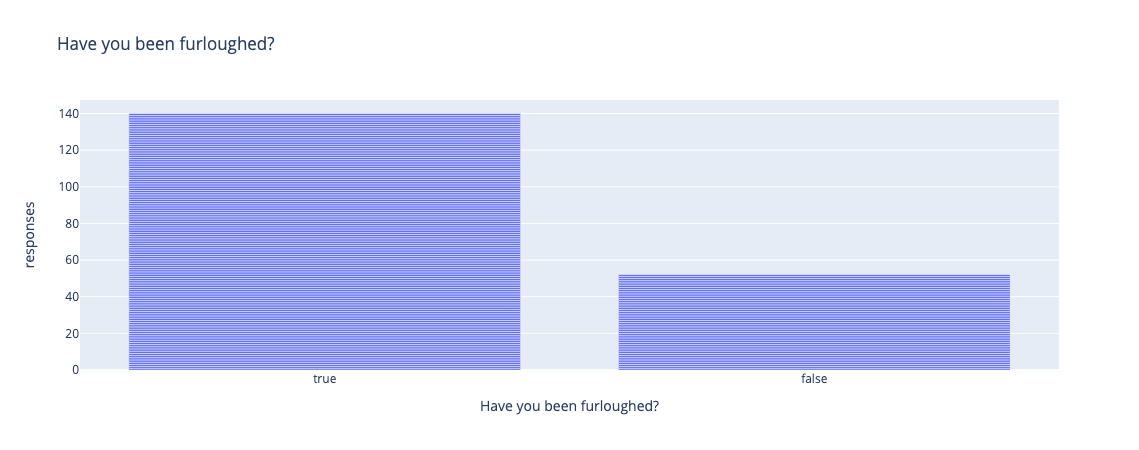

In [7]:
#data_have_been_furloughed = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data, x='Have you been furloughed?', y='responses', title='Have you been furloughed?')
fig.show()

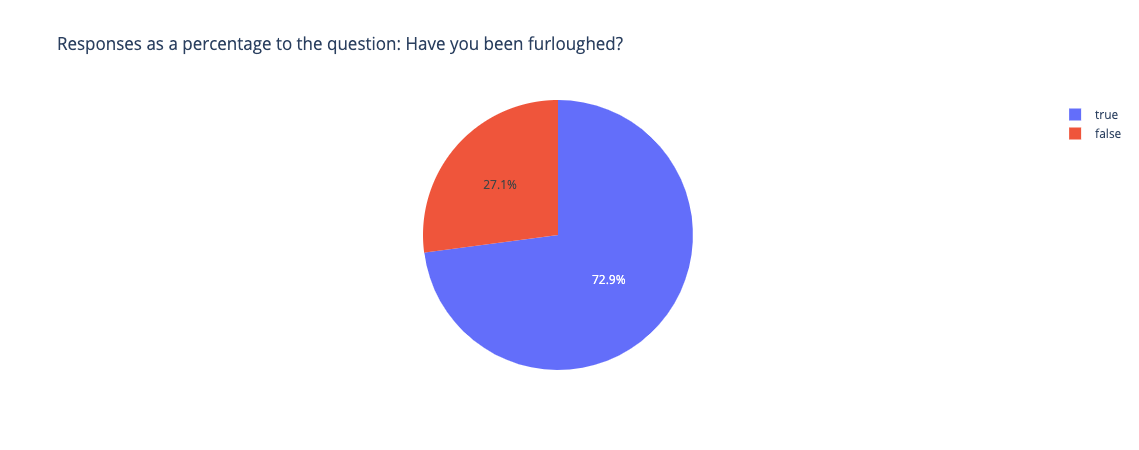

In [18]:
fig = go.Figure(data=[go.Pie(labels=data['Have you been furloughed?'], values=data['responses'])])
fig.update_layout(title_text='Responses as a percentage to the question: Have you been furloughed?')
fig.show()

In [36]:
data['Overall, are you finding being furloughed a positive experience?'].value_counts()

True     105
False     35
Name: Overall, are you finding being furloughed a positive experience?, dtype: int64

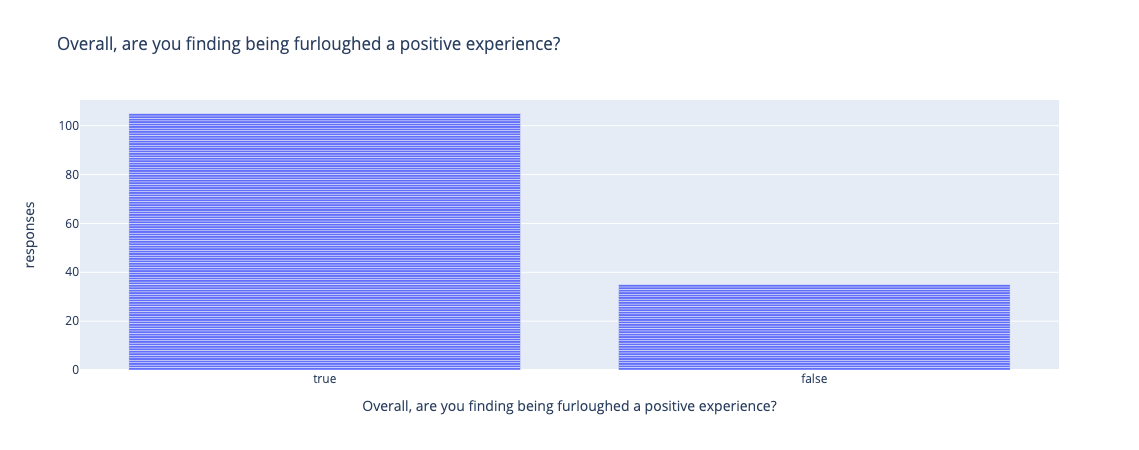

In [47]:
fig = px.bar(furloughed_data, x='Overall, are you finding being furloughed a positive experience?', y='responses', title='Overall, are you finding being furloughed a positive experience?')
fig.show()

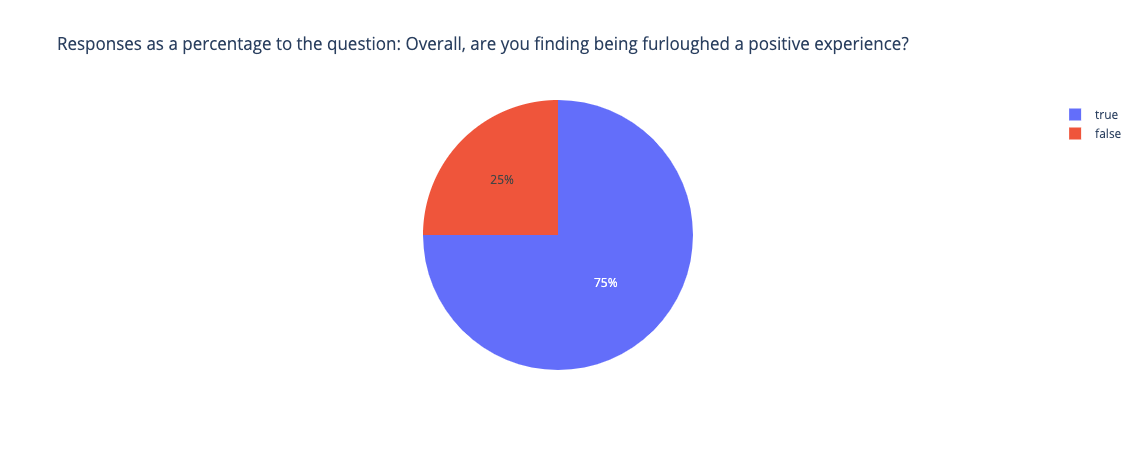

In [20]:
fig = go.Figure(data=[go.Pie(labels=furloughed_data['Overall, are you finding being furloughed a positive experience?'], values=furloughed_data['responses'])])
fig.update_layout(title_text='Responses as a percentage to the question: Overall, are you finding being furloughed a positive experience?')
fig.show()

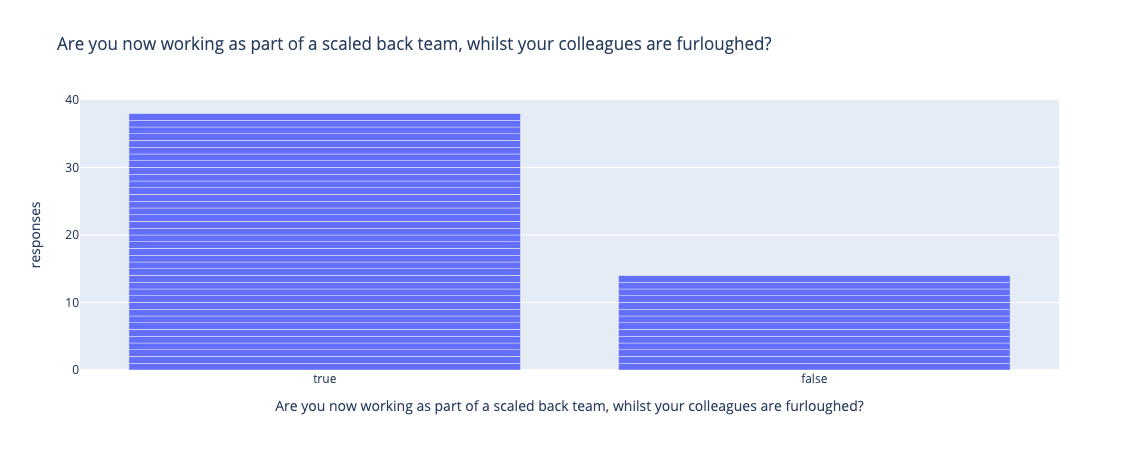

In [48]:
fig = px.bar(caretaker_data, x='Are you now working as part of a scaled back team, whilst your colleagues are furloughed?', y='responses', title='Are you now working as part of a scaled back team, whilst your colleagues are furloughed?')
fig.show()


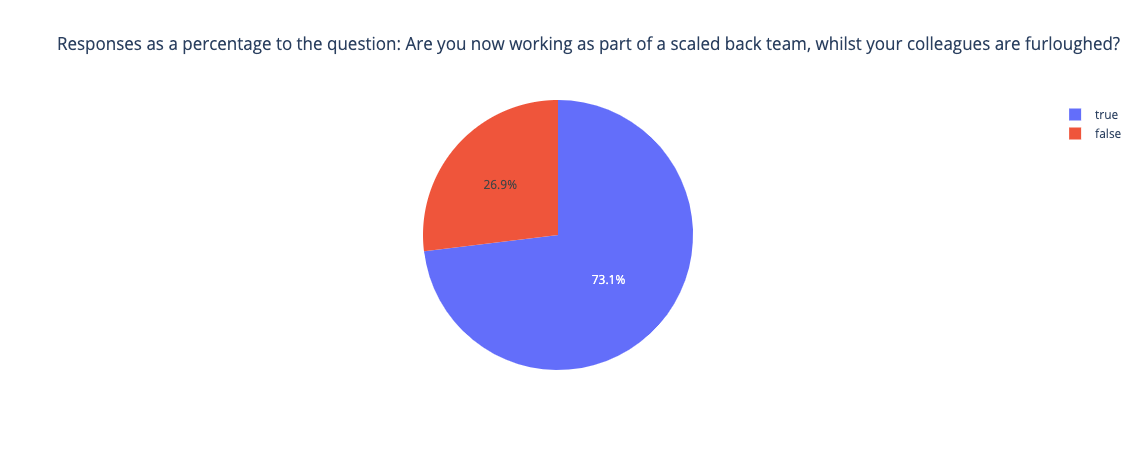

In [21]:
fig = go.Figure(data=[go.Pie(labels=caretaker_data['Are you now working as part of a scaled back team, whilst your colleagues are furloughed?'], values=caretaker_data['responses'])])
fig.update_layout(title_text='Responses as a percentage to the question: Are you now working as part of a scaled back team, whilst your colleagues are furloughed?')
fig.show()

In [37]:
data['Overall, are you finding being part of scaled-back, caretaker team a positive experience?'].value_counts()

True     27
False    11
Name: Overall, are you finding being part of scaled-back, caretaker team a positive experience?, dtype: int64

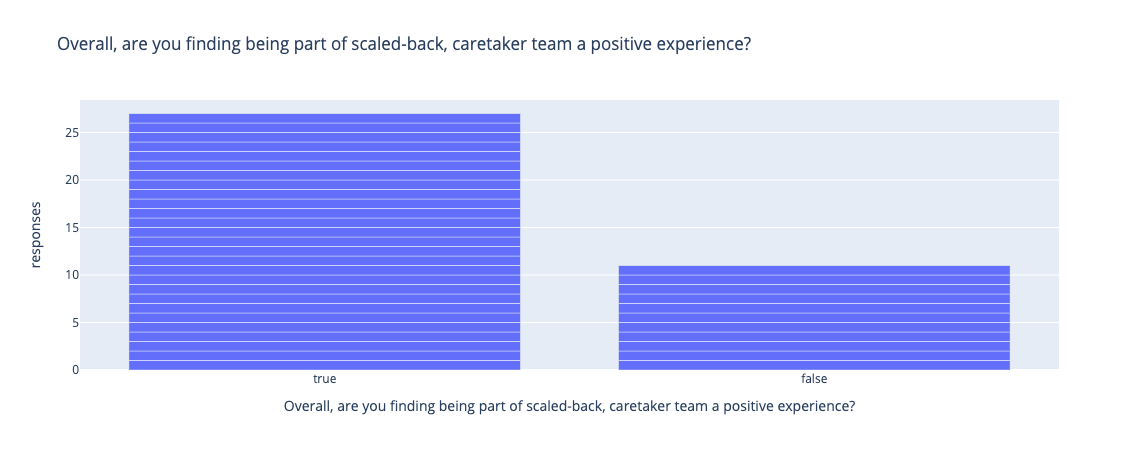

In [49]:
fig = px.bar(caretaker_data, x='Overall, are you finding being part of scaled-back, caretaker team a positive experience?', y='responses', title='Overall, are you finding being part of scaled-back, caretaker team a positive experience?')
fig.show()



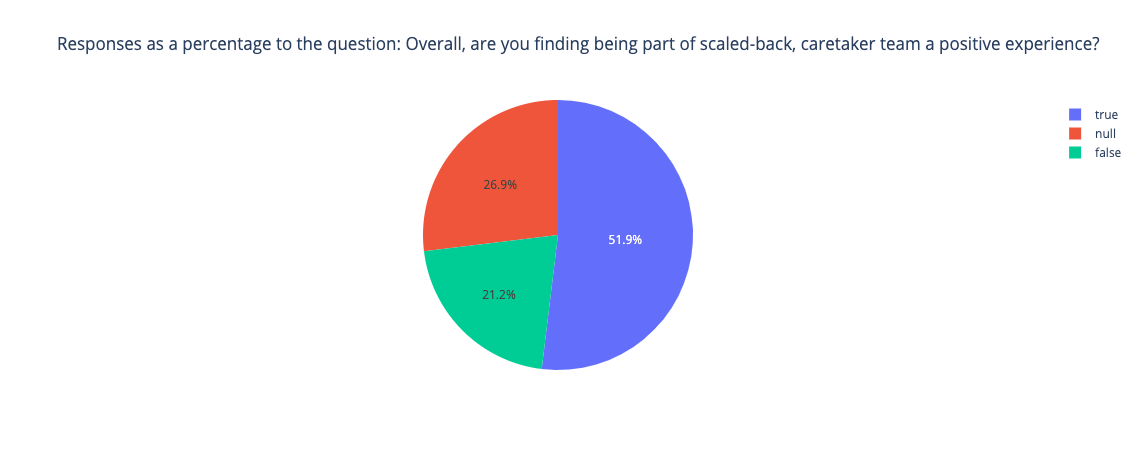

In [22]:
fig = go.Figure(data=[go.Pie(labels=caretaker_data['Overall, are you finding being part of scaled-back, caretaker team a positive experience?'], values=caretaker_data['responses'])])
fig.update_layout(title_text='Responses as a percentage to the question: Overall, are you finding being part of scaled-back, caretaker team a positive experience?')
fig.show()

In [23]:
why_enjoying_it = pr.create_subset(data, 'why_enjoying_it', 2, 10)
why_not_positive = pr.create_subset(data, 'why_not_positive', 5, 10)
learned_anything = pr.create_subset(data, 'learned_anything', 6, 10)
what_would_help_you = pr.create_subset(data, 'what_would_help_you', 7, 10)
what_think_that_is = pr.create_subset(data, 'what_think_that_is', 8, 10)
len(why_enjoying_it)

105

### Why not positive text reponse analysis and cleaning

In [24]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

why_not_positive = clean_text(why_not_positive, "text")
why_not_positive.head()

text  \
2   feeling very useless and often times even wort...   
6   i feel without purpose disappointed not to be ...   
14            uncertainty lack of routine and purpose   
15  i miss working day to day interactions with pe...   
22  unsettled knowing there are people and work an...   

                               token  
2   ia3cphe6oj1358lw2hnmia3cphry4t6x  
6   k65zamkqx4hd9npk65s5r6llry7m2a4d  
14  yarbka7gdvbfpnufyarl107hyox3f4dc  
15  cez4n2ji6xhuugapbcez4n7131ndsvxm  
22  ol61crh8x6vlp8ol61cl8jedy6we0lnc

In [25]:
why_not_positive['parsed'] = why_not_positive.text.apply(nlp)
why_not_positive.head()

text  \
2   feeling very useless and often times even wort...   
6   i feel without purpose disappointed not to be ...   
14            uncertainty lack of routine and purpose   
15  i miss working day to day interactions with pe...   
22  unsettled knowing there are people and work an...   

                               token  \
2   ia3cphe6oj1358lw2hnmia3cphry4t6x   
6   k65zamkqx4hd9npk65s5r6llry7m2a4d   
14  yarbka7gdvbfpnufyarl107hyox3f4dc   
15  cez4n2ji6xhuugapbcez4n7131ndsvxm   
22  ol61crh8x6vlp8ol61cl8jedy6we0lnc   

                                               parsed  
2   (feeling, very, useless, and, often, times, ev...  
6   (i, feel, without, purpose, disappointed, not,...  
14     (uncertainty, lack, of, routine, and, purpose)  
15  (i, miss, working, day, to, day, interactions,...  
22  (unsettled, knowing, there, are, people, and, ...

In [26]:
#corpus = st.CorpusFromParsedDocuments(why_not_positive, parsed_col='parsed').build()

In [27]:
import nltk.corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebecca.vickery/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
why_not_positive['text'] = why_not_positive['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
why_not_positive.head()

text  \
2   feeling useless often times even worthless im ...   
6   feel without purpose disappointed useful enoug...   
14                   uncertainty lack routine purpose   
15  miss working day day interactions people feeli...   
22  unsettled knowing people work needed keeping e...   

                               token  \
2   ia3cphe6oj1358lw2hnmia3cphry4t6x   
6   k65zamkqx4hd9npk65s5r6llry7m2a4d   
14  yarbka7gdvbfpnufyarl107hyox3f4dc   
15  cez4n2ji6xhuugapbcez4n7131ndsvxm   
22  ol61crh8x6vlp8ol61cl8jedy6we0lnc   

                                               parsed  
2   (feeling, very, useless, and, often, times, ev...  
6   (i, feel, without, purpose, disappointed, not,...  
14     (uncertainty, lack, of, routine, and, purpose)  
15  (i, miss, working, day, to, day, interactions,...  
22  (unsettled, knowing, there, are, people, and, ...

In [29]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
# tokenise text
why_not_positive['text_stem'] = why_not_positive['text'].apply(lambda x: word_tokenize(x))

#stemming 
def word_stemmer(text):
    #stem_text = [PorterStemmer().stem(i) for i in text]
    stem_text = [SnowballStemmer("english").stem(i) for i in text]
    return stem_text
why_not_positive['text_stem'] = why_not_positive['text_stem'].apply(lambda x: word_stemmer(x))

# back to string so we can utilise different n grams in the vectoriser
why_not_positive['text_stem'] = why_not_positive['text_stem'].apply(lambda x: ' '.join([word for word in x]))
why_not_positive.head()

text  \
2   feeling useless often times even worthless im ...   
6   feel without purpose disappointed useful enoug...   
14                   uncertainty lack routine purpose   
15  miss working day day interactions people feeli...   
22  unsettled knowing people work needed keeping e...   

                               token  \
2   ia3cphe6oj1358lw2hnmia3cphry4t6x   
6   k65zamkqx4hd9npk65s5r6llry7m2a4d   
14  yarbka7gdvbfpnufyarl107hyox3f4dc   
15  cez4n2ji6xhuugapbcez4n7131ndsvxm   
22  ol61crh8x6vlp8ol61cl8jedy6we0lnc   

                                               parsed  \
2   (feeling, very, useless, and, often, times, ev...   
6   (i, feel, without, purpose, disappointed, not,...   
14     (uncertainty, lack, of, routine, and, purpose)   
15  (i, miss, working, day, to, day, interactions,...   
22  (unsettled, knowing, there, are, people, and, ...   

                                            text_stem  
2   feel useless often time even worthless im chil...  
6   feel without purpos disappoint use enough keep...  
14                     uncertainti lack routin purpos  
15  miss work day day interact peopl feel someth u...  
22  unsettl know peopl work need keep eye thing di...

In [30]:
# Adding stemming to the CountVectorizer

from textblob import TextBlob

# Use TextBlob
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Use NLTK's PorterStemmer
def stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [porter_stemmer.stem(word) for word in words]
    return words

vec = CountVectorizer(tokenizer=textblob_tokenizer)

NameError: name 'CountVectorizer' is not defined

/Users/rebecca.vickery/.local/share/virtualenvs/furlough-feelings-1sPBLJSY/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



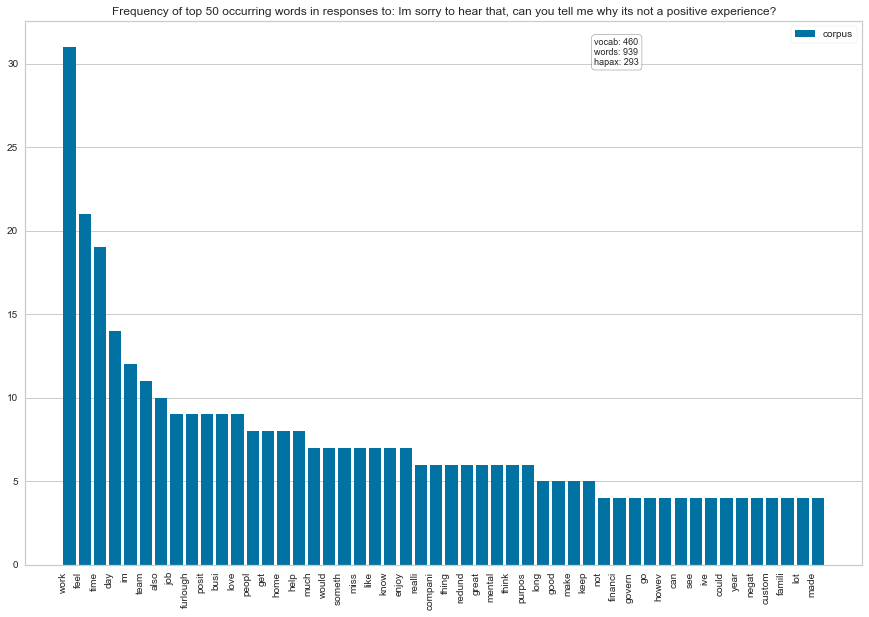

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(why_not_positive['text_stem'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring words in responses to: Im sorry to hear that, can you tell me why its not a positive experience?')
visualizer.fit(docs)
visualizer.show()

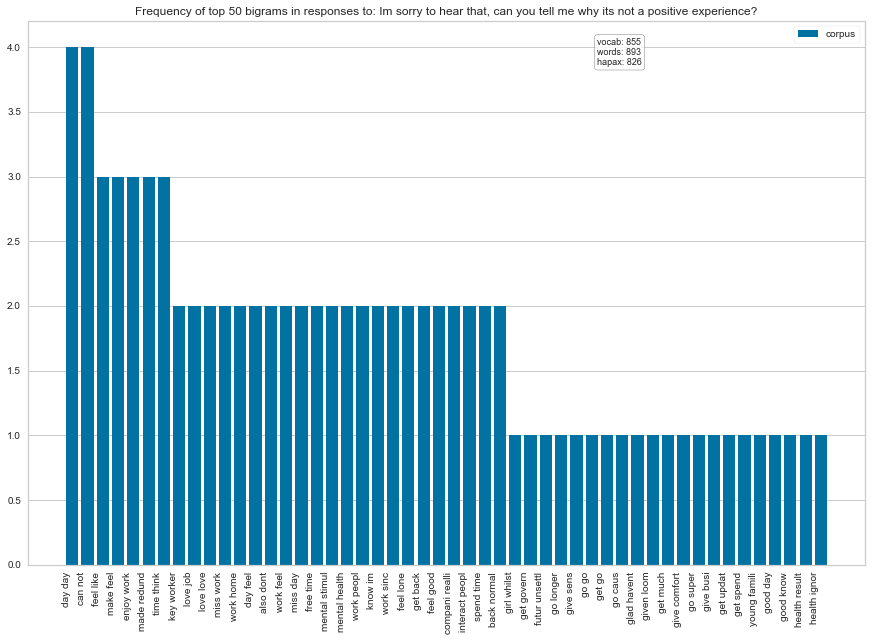

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
docs       = vectorizer.fit_transform(why_not_positive['text_stem'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 bigrams in responses to: Im sorry to hear that, can you tell me why its not a positive experience?')
visualizer.fit(docs)
visualizer.show()

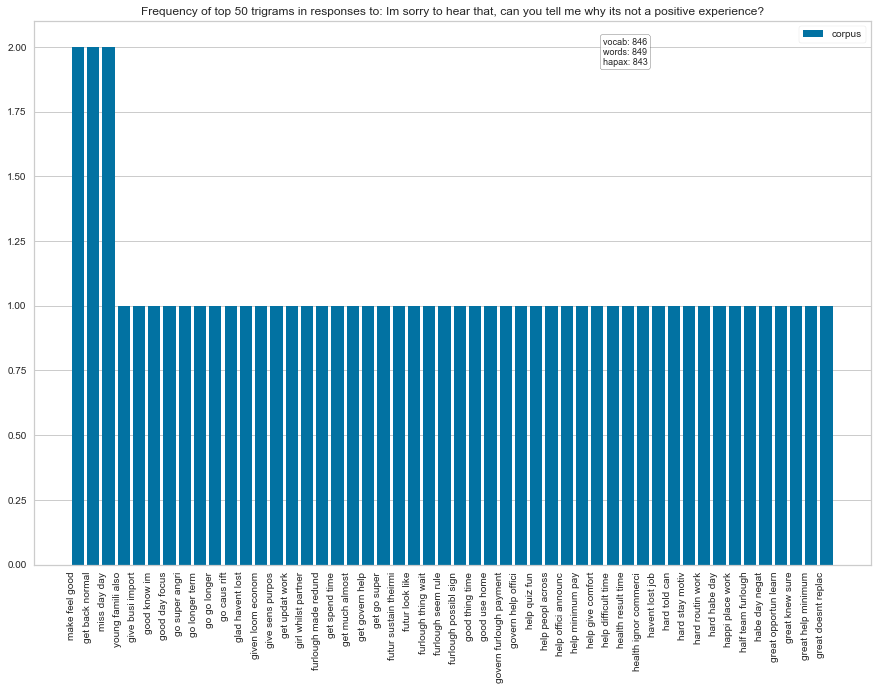

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(ngram_range=(3, 3))
docs       = vectorizer.fit_transform(why_not_positive['text_stem'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 trigrams in responses to: Im sorry to hear that, can you tell me why its not a positive experience?')
visualizer.fit(docs)
visualizer.show()

### Why enjoying it text reponse analysis and cleaning

In [59]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

why_enjoying_it = clean_text(why_enjoying_it, "text")
why_enjoying_it.head()

text  \
0  im feel like i now have the time to invest in ...   
1  i have lots of creative pursuits that i often ...   
3  i have more time to study i am able to spend v...   
4  recently moved house so i am very busy i am no...   
5  im looking at the positives and this is bonus ...   

                              token  
0  q7ygqc0wetve1pgq7998ef1l3h3ghomc  
1  qsle0bp9xi6c9n0nic0qsle0ma3xovzq  
3  d7x57388oj9pfzwzwod7x5738uex2vna  
4  08h6epyvgp4h1722y08h6epy986gkfnt  
5  bamyisxeo4bm3islq7tbamy45g3jnlm9

In [60]:
stop = stopwords.words('english')
why_enjoying_it['text'] = why_enjoying_it['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
why_enjoying_it.head()

text  \
0  im feel like time invest im active ive started...   
1  lots creative pursuits often dont time really ...   
3  time study able spend valuable time family get...   
4  recently moved house busy sure would feel wasn...   
5  im looking positives bonus time giving time wo...   

                              token  
0  q7ygqc0wetve1pgq7998ef1l3h3ghomc  
1  qsle0bp9xi6c9n0nic0qsle0ma3xovzq  
3  d7x57388oj9pfzwzwod7x5738uex2vna  
4  08h6epyvgp4h1722y08h6epy986gkfnt  
5  bamyisxeo4bm3islq7tbamy45g3jnlm9

In [83]:
from nltk.tokenize import sent_tokenize, word_tokenize
# tokenise text
why_enjoying_it['text_stem'] = why_enjoying_it['text'].apply(lambda x: word_tokenize(x))

#stemming 
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
why_enjoying_it['text_stem'] = why_enjoying_it['text_stem'].apply(lambda x: word_stemmer(x))

# back to string so we can utilise different n grams in the vectoriser
why_enjoying_it['text_stem'] = why_enjoying_it['text_stem'].apply(lambda x: ' '.join([word for word in x]))
why_enjoying_it.head()

text  \
0  im feel like time invest im active ive started...   
1  lots creative pursuits often dont time really ...   
3  time study able spend valuable time family get...   
4  recently moved house busy sure would feel wasn...   
5  im looking positives bonus time giving time wo...   

                              token  \
0  q7ygqc0wetve1pgq7998ef1l3h3ghomc   
1  qsle0bp9xi6c9n0nic0qsle0ma3xovzq   
3  d7x57388oj9pfzwzwod7x5738uex2vna   
4  08h6epyvgp4h1722y08h6epy986gkfnt   
5  bamyisxeo4bm3islq7tbamy45g3jnlm9   

                                           text_stem  
0  im feel like time invest im activ ive start di...  
1  lot creativ pursuit often dont time realli goo...  
3  time studi abl spend valuabl time famili get j...  
4  recent move hous busi sure would feel wasnt bu...  
5  im look posit bonu time give time wouldnt usua...

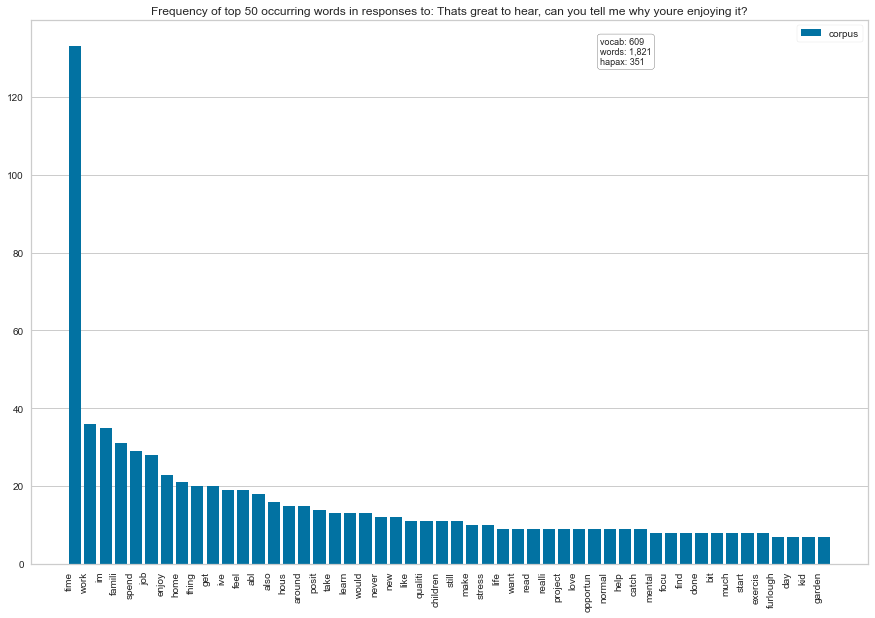

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(why_enjoying_it['text_stem'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring words in responses to: Thats great to hear, can you tell me why youre enjoying it?')
visualizer.fit(docs)
visualizer.show()

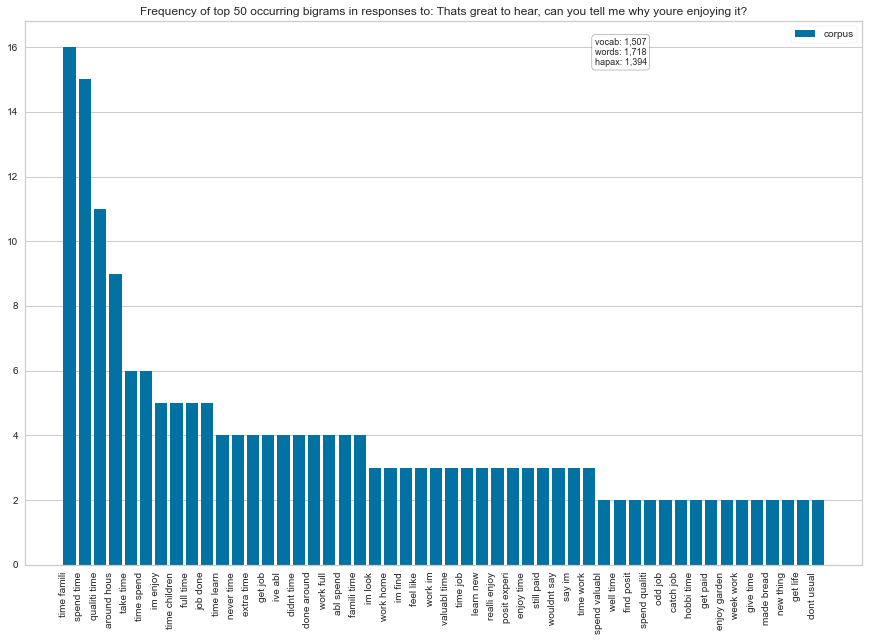

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
docs       = vectorizer.fit_transform(why_enjoying_it['text_stem'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring bigrams in responses to: Thats great to hear, can you tell me why youre enjoying it?')
visualizer.fit(docs)
visualizer.show()

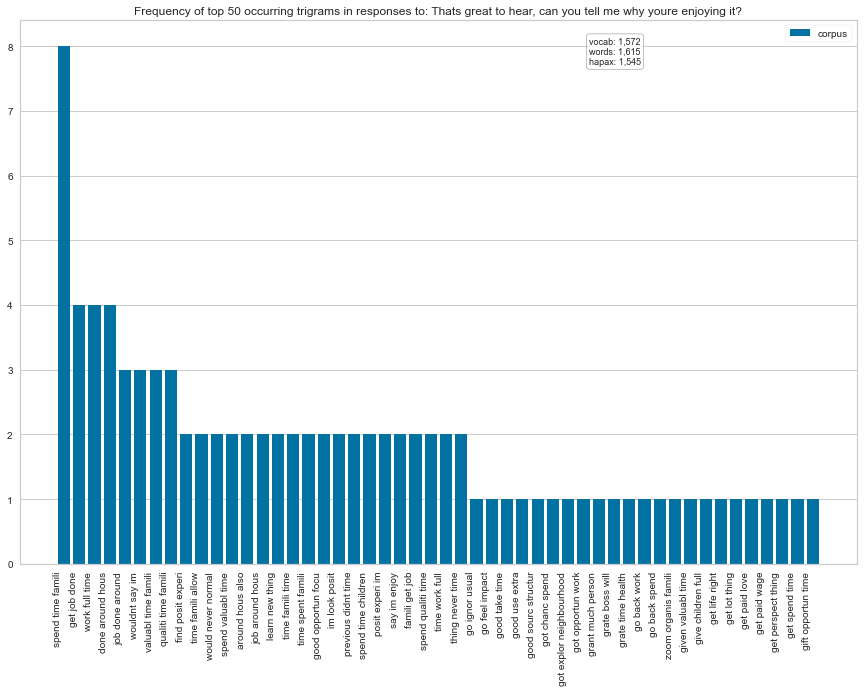

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(ngram_range=(3, 3))
docs       = vectorizer.fit_transform(why_enjoying_it['text_stem'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring trigrams in responses to: Thats great to hear, can you tell me why youre enjoying it?')
visualizer.fit(docs)
visualizer.show()

### What would help you text reponse analysis and cleaning

In [65]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

what_would_help_you = clean_text(what_would_help_you, "text")
what_would_help_you.head()

text  \
2   hmmmgood question ive been asking myself that ...   
6   something real to focus on something to dampen...   
14                  something to help give me purpose   
15  i am going to try and see if i can get a secon...   
22       cant think of anything anyone can do to help   

                               token  
2   ia3cphe6oj1358lw2hnmia3cphry4t6x  
6   k65zamkqx4hd9npk65s5r6llry7m2a4d  
14  yarbka7gdvbfpnufyarl107hyox3f4dc  
15  cez4n2ji6xhuugapbcez4n7131ndsvxm  
22  ol61crh8x6vlp8ol61cl8jedy6we0lnc

In [66]:
stop = stopwords.words('english')
what_would_help_you['text'] = what_would_help_you['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
what_would_help_you.head()

text  \
2   hmmmgood question ive asking think finding pur...   
6       something real focus something dampen anxiety   
14                        something help give purpose   
15  going try see get second job whilst furlough v...   
22                    cant think anything anyone help   

                               token  
2   ia3cphe6oj1358lw2hnmia3cphry4t6x  
6   k65zamkqx4hd9npk65s5r6llry7m2a4d  
14  yarbka7gdvbfpnufyarl107hyox3f4dc  
15  cez4n2ji6xhuugapbcez4n7131ndsvxm  
22  ol61crh8x6vlp8ol61cl8jedy6we0lnc

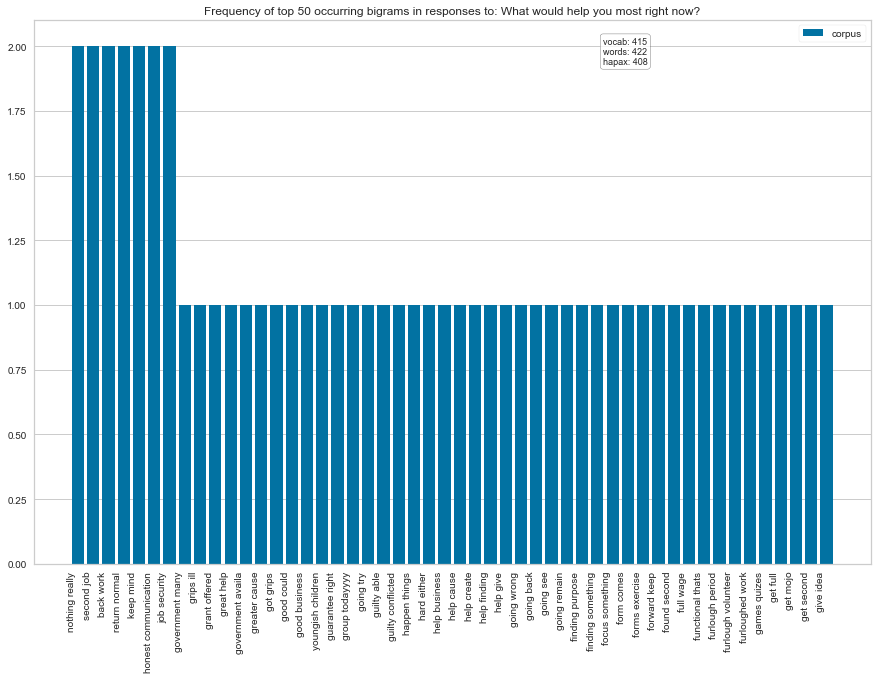

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
docs       = vectorizer.fit_transform(what_would_help_you['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring bigrams in responses to: What would help you most right now?')
visualizer.fit(docs)
visualizer.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(what_would_help_you['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring words in responses to: What would help you most right now?')
visualizer.fit(docs)
visualizer.show()

### That's really good to hear, why do you think that is? text reponse analysis and cleaning

In [24]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

what_think_that_is = clean_text(what_think_that_is, "text")
what_think_that_is.head()

text  \
8   i feel kept in the loop with all areas of the ...   
10            have purpose and am making a difference   
18  the members of the multi channel team that are...   
19  everyone working well together and now everyth...   
21  working with a team member who has the opposit...   

                               token  
8   38ngqogsgcz9yf21zkn38ngqo5a0d5tt  
10  vy3xvdok30la8evvy38vtocv8aziyybj  
18  srbj2kw8fw3ch6u0srbj2bv1gm7acqcd  
19  oi60l1bosyhyhkcucu6oi60lzd5oz21u  
21  i10kxbekzt4e5i10c91qa6wur15c2vle

In [25]:
stop = stopwords.words('english')
what_think_that_is['text'] = what_think_that_is['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
what_think_that_is.head()

text  \
8   feel kept loop areas caretaker team full trans...   
10                          purpose making difference   
18  members multi channel team 10 us rather around...   
19  everyone working well together everything cent...   
21  working team member opposite skills set yet th...   

                               token  
8   38ngqogsgcz9yf21zkn38ngqo5a0d5tt  
10  vy3xvdok30la8evvy38vtocv8aziyybj  
18  srbj2kw8fw3ch6u0srbj2bv1gm7acqcd  
19  oi60l1bosyhyhkcucu6oi60lzd5oz21u  
21  i10kxbekzt4e5i10c91qa6wur15c2vle

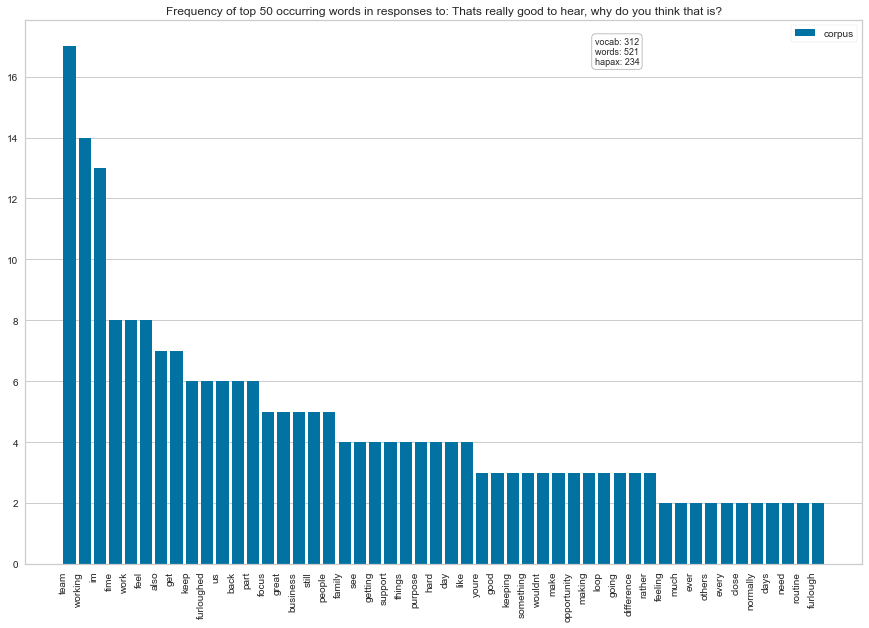

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(what_think_that_is['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring words in responses to: Thats really good to hear, why do you think that is?')
visualizer.fit(docs)
visualizer.show()

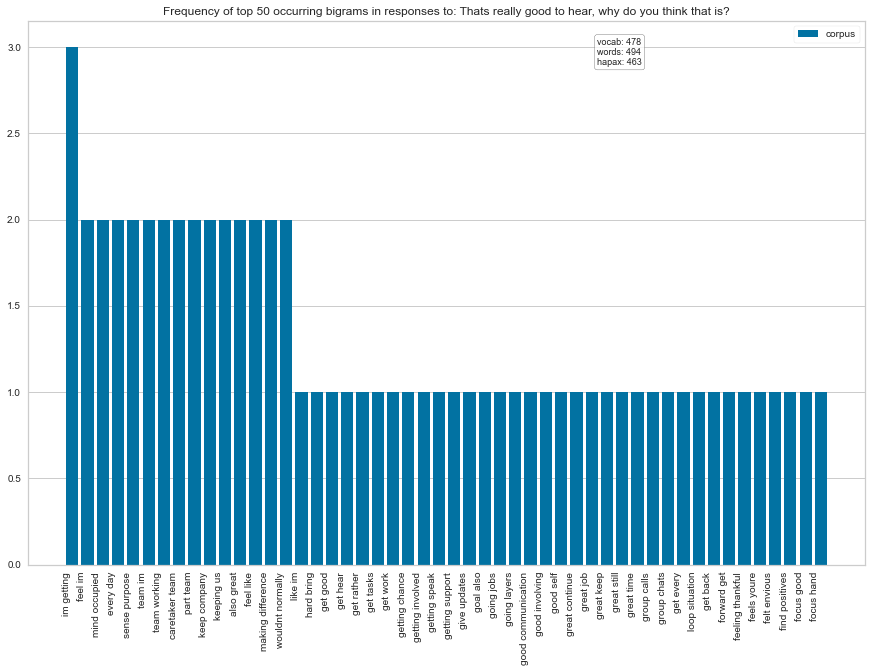

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
docs       = vectorizer.fit_transform(what_think_that_is['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring bigrams in responses to: Thats really good to hear, why do you think that is?')
visualizer.fit(docs)
visualizer.show()

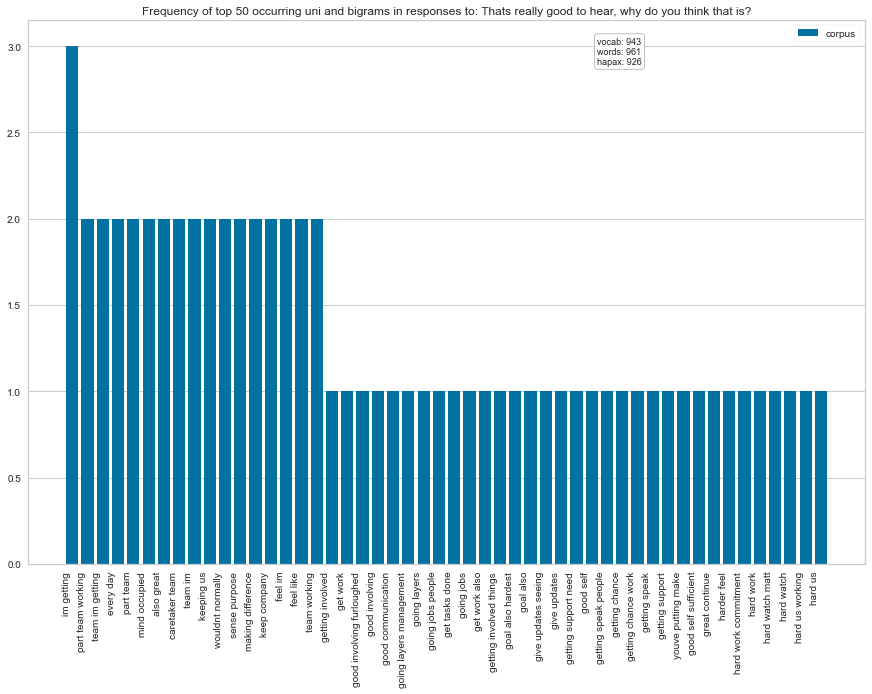

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(ngram_range=(2, 3))
docs       = vectorizer.fit_transform(what_think_that_is['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring uni and bigrams in responses to: Thats really good to hear, why do you think that is?')
visualizer.fit(docs)
visualizer.show()

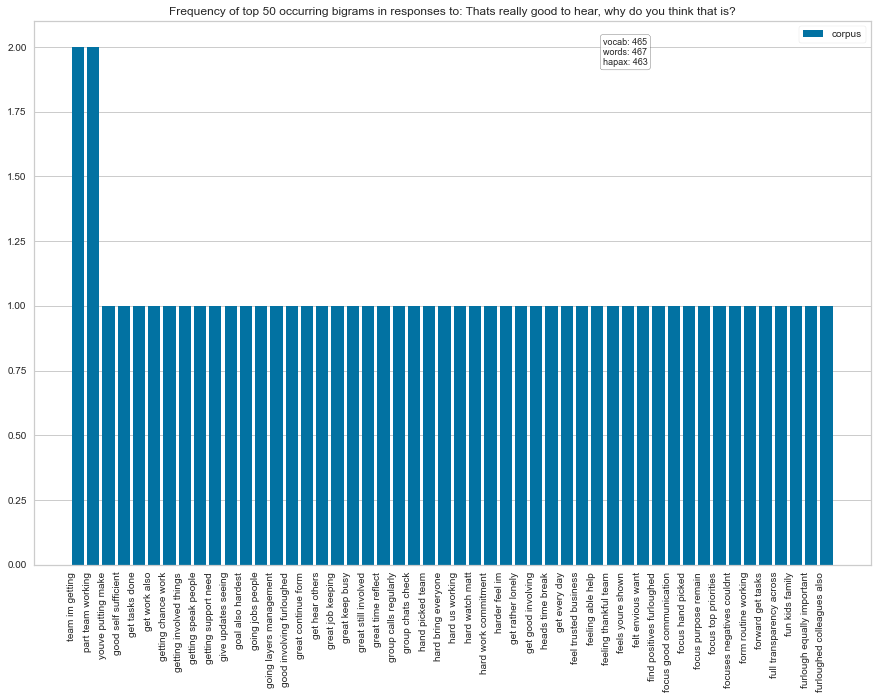

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(ngram_range=(3, 3))
docs       = vectorizer.fit_transform(what_think_that_is['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring bigrams in responses to: Thats really good to hear, why do you think that is?')
visualizer.fit(docs)
visualizer.show()

### Have you learned anything new about yourself? text reponse analysis and cleaning

In [29]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

learned_anything = clean_text(learned_anything, "text")
learned_anything.head()

text  \
0          i enjoy being at home more than i thought   
1  im definitely obsessively productive if i have...   
3  yes i do need structure so i have to plan each...   
4  i took things for granted and can be impatient...   
5                                         not as yet   

                              token  
0  q7ygqc0wetve1pgq7998ef1l3h3ghomc  
1  qsle0bp9xi6c9n0nic0qsle0ma3xovzq  
3  d7x57388oj9pfzwzwod7x5738uex2vna  
4  08h6epyvgp4h1722y08h6epy986gkfnt  
5  bamyisxeo4bm3islq7tbamy45g3jnlm9

In [30]:
stop = stopwords.words('english')
learned_anything['text'] = learned_anything['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
learned_anything.head()

text  \
0                                 enjoy home thought   
1  im definitely obsessively productive day im re...   
3  yes need structure plan day even simple things...   
4  took things granted impatient need learn relax...   
5                                                yet   

                              token  
0  q7ygqc0wetve1pgq7998ef1l3h3ghomc  
1  qsle0bp9xi6c9n0nic0qsle0ma3xovzq  
3  d7x57388oj9pfzwzwod7x5738uex2vna  
4  08h6epyvgp4h1722y08h6epy986gkfnt  
5  bamyisxeo4bm3islq7tbamy45g3jnlm9

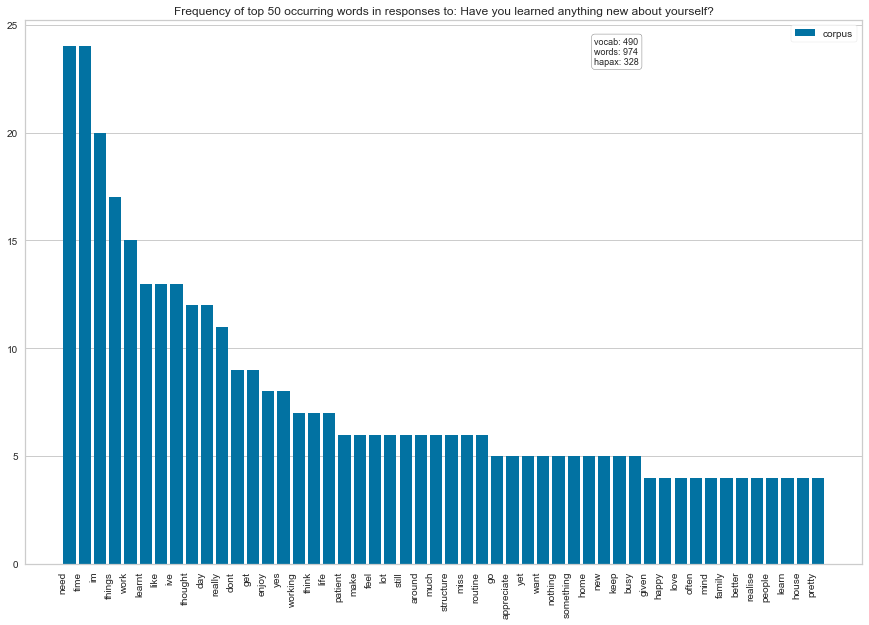

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(learned_anything['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring words in responses to: Have you learned anything new about yourself?')
visualizer.fit(docs)
visualizer.show()

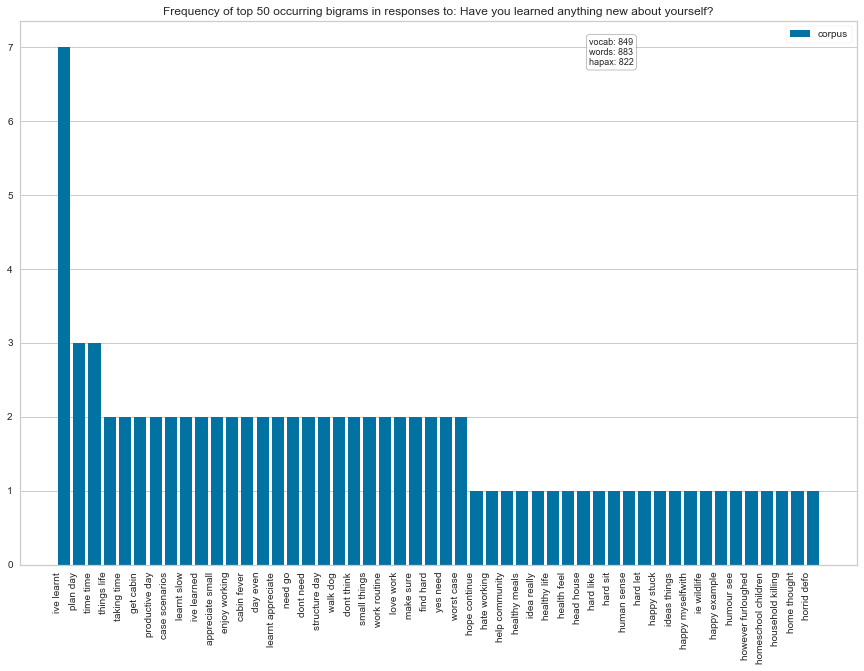

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
docs       = vectorizer.fit_transform(learned_anything['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring bigrams in responses to: Have you learned anything new about yourself?')
visualizer.fit(docs)
visualizer.show()

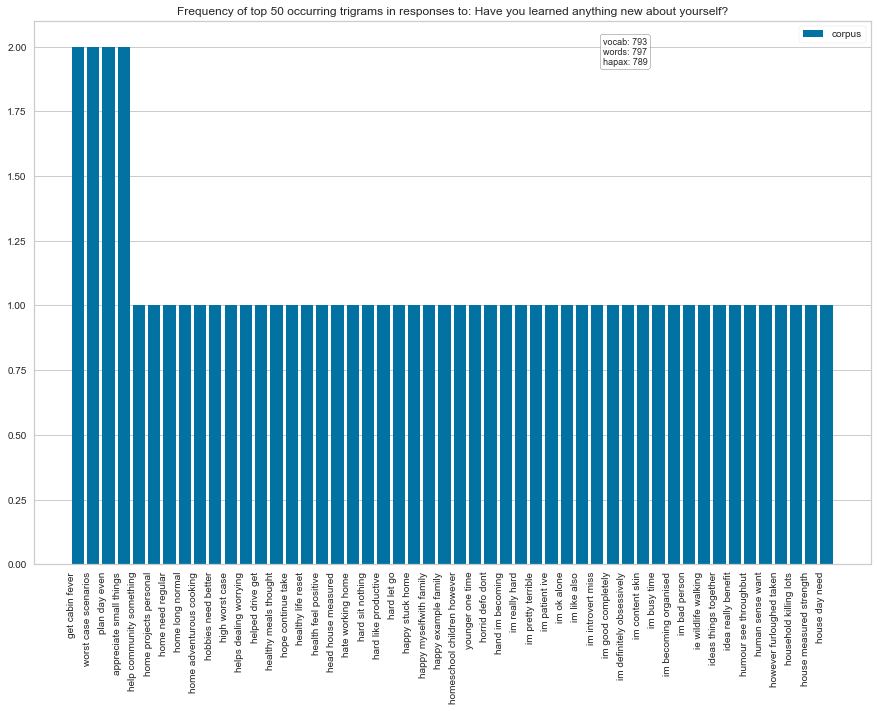

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(ngram_range=(3, 3))
docs       = vectorizer.fit_transform(learned_anything['text'])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(1080, 720), title='Frequency of top 50 occurring trigrams in responses to: Have you learned anything new about yourself?')
visualizer.fit(docs)
visualizer.show()